In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader
import numpy as np

In [4]:
dataset = MNIST(root="./data", download=True)

In [5]:
print(len(dataset))

60000


label: 3


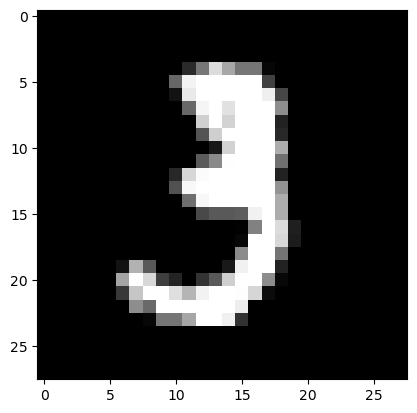

In [6]:
image, label = dataset[10]
plt.imshow(image, cmap="gray")
print(f"label: {label}")


In [7]:
mnist_dataset = MNIST(root="data/", train=True, transform= transforms.ToTensor())

In [8]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape)    # Colour channel, pixel_x, pixel_y
print(label)

torch.Size([1, 28, 28])
5


In [34]:
mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
# Using DataLoader

batch_size = 128

mnist_loader = DataLoader(mnist_dataset, batch_size, shuffle=True)

### 1. Create a generator to create digits out of noise

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


In [16]:
# Dsicriminator Network

class Discriminator(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.out = nn.Linear(256,1)

    def forward(self, X):
        X = X.reshape(-1,28*28)
        print(X.shape)
        X = F.leaky_relu( self.fc1(X) )
        X = F.leaky_relu( self.fc2(X) )
        X = self.out(X)
        return F.sigmoid( X )

In [ ]:
model_D = Discriminator()

model_D.forward(image_tensor)

torch.Size([1, 784])


tensor([[0.5193]], grad_fn=<SigmoidBackward0>)

In [24]:
class Generator(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(64, 256)
        self.fc2 = nn.Linear(256, 256)
        self.out = nn.Linear(256, 28*28)

    def forward(self, X):
        X = F.leaky_relu( self.fc1 (X) )
        X = F.leaky_relu( self.fc2 (X) )
        X = self.out( X )

        return F.tanh(X)

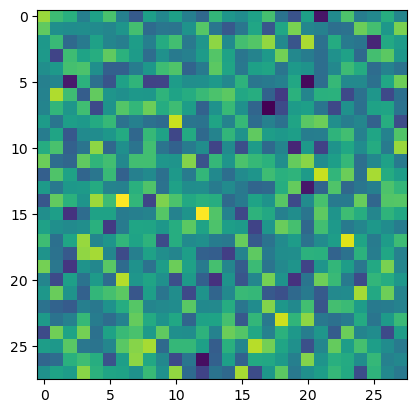

In [ ]:
# Random noise

model_G = Generator()

random_sample = torch.randn(10,64)

y = model_G.forward(random_sample)

plt.imshow( y[0,:].detach().squeeze().view(28,28) )

In [31]:
# Train the model

lossfun = nn.BCELoss()

# send to GPU
dnet = Discriminator().to(device)
gnet = Generator().to(device)

# Optimisers
d_optimiser = torch.optim.Adam(dnet.parameters(), lr=.0003)
g_optimiser = torch.optim.Adam(gnet.parameters(), lr=0.0003)

In [ ]:
epochs = 50000

losses = np.zeros((epochs, 2))
disdecs = np.zeros((epochs, 2))  # discriminator decisions

for i in range(epochs):
    for batch_idx, (real_images, label) in enumerate(mnist_loader):
        real_images = real_images.reshape(-1, 28*28)
        real_images = real_images.to(device)
        #print(real_images.shape)

        fake_images = gnet.forward(   torch.randn(real_images.shape[0], real_images.shape[1] ).to(device)   )

        real_labels = np.ones(batch_size, 1).to(device)
        fake_labels = np.zeros(batch_size, 1).to(device)
        
        ##### TRAIN THE DISCRIMINATOR ####

        pred_fake = dnet.forward(  fake_images  )
        d_loss_fake = lossfun(pred_fake, fake_labels)

        pred_real = dnet.forward(  real_images   )
        d_loss_real = dnet.forward( fake_labels  )

        d_loss = pred_real + d_loss_real

        losses[i, 0] = d_loss
        disdecs[i, 0] = torch.mean((pred_real>.5).floar()).detach()

        # Backprop
        d_optimiser.zero_grad()
        d_loss.backward()
        d_optimiser.step()

        ##### TRAIN THE GENERATOR ####

        fake_images = gnet.forward(   torch.randn(real_images.shape[0], real_images.shape[1] ).to(device)   )
        pred_fake = dnet.forward( fake_images )



torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size(

KeyboardInterrupt: 